In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
import os
from   scipy import stats
import statsmodels.api as sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# importar modulos de sklearn (SVC,train_test_split,accuracy_score)
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

C:\Users\admin\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [15]:
df_Churn_Modelling_archivo = pd.read_csv('Churn_Modelling.csv')

In [16]:
# Leer el archivo CSV
df_Churn_Modelling_archivo = pd.read_csv('Churn_Modelling.csv')

# Verificar si hay duplicados en todo el DataFrame
sin_duplicados = df_Churn_Modelling_archivo.drop_duplicates()

# Imprimir los resultados
print(sin_duplicados)

      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMemb

In [17]:
df_Churn_Modelling_archivo.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [18]:
df_Churn_Modelling_archivo.describe

<bound method NDFrame.describe of       RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumO

In [19]:
df_Churn_Modelling_archivo.shape

(10000, 14)

In [20]:
#Algunas algunas estadísticas descriptivas sobre el DataFrame para facilitar la lectura de los datos
df_Churn_Modelling_archivo.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [21]:
# Se crea un diccionario de mapeo para la transformación de  Gender string en números 0- 1
gender_mapping = {'Male': 1, 'Female': 0}

# Se aplica la transformación a la columna 'Gender' y se crea una nueva columna 'Gender_modificado'
df_Churn_Modelling_archivo['Gender_modificado'] = df_Churn_Modelling_archivo['Gender'].map(gender_mapping)

# Imprimir el data frame
print(df_Churn_Modelling_archivo.head())


   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  Gender_modificado  
0        101348.88       1                  0  
1        112542.58       0                  0  
2        11393

In [22]:
df_Churn_Modelling_archivo.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_modificado
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0


In [23]:
df_Churn_Modelling_archivo.head(20)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_modificado
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0,1
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,0
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0,1
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0,1


In [24]:
# Se crea un diccionario de mapeo para la transformación de  Geography string en números 1 = Spain , 2= France  y 3= Germany
geography_mapping = {'France': 2, 'Spain': 1, 'Germany': 3}

# Se aplica la transformación a la columna 'Geography' y se crea una nueva columna 'Geography_modificado'
df_Churn_Modelling_archivo['Geography_modificado'] = df_Churn_Modelling_archivo['Geography'].map(geography_mapping)

# Se Imprime el data frame
print(df_Churn_Modelling_archivo.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  Gender_modificado  Geography_modificado  
0        101348.88       1                  0                     2  
1        112542.58

In [25]:
df_Churn_Modelling_archivo.head(20)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_modificado,Geography_modificado
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,2
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,1
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,2
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,2
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,1
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,1,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0,1,2
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,0,3
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0,1,2
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0,1,2


In [26]:
# Transformar la columna 'EstimatedSalary' a número y sin decimales
df_Churn_Modelling_archivo['EstimatedSalary'] = df_Churn_Modelling_archivo['EstimatedSalary'].apply(lambda x: f"{int(round(float(str(x).replace('$', '').replace(',', '')))):,}")

# Imprimir las primeras 5 filas del DataFrame
print(df_Churn_Modelling_archivo.head())




   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

  EstimatedSalary  Exited  Gender_modificado  Geography_modificado  
0         101,349       1                  0                     2  
1         112,543   

In [27]:
# Transformar la columna 'EstimatedSalary' a moneda y sin decimales
df_Churn_Modelling_archivo['Balance'] = df_Churn_Modelling_archivo['Balance'].apply(lambda x: f"{int(round(float(str(x).replace('$', '').replace(',', '')))):,}")

# Imprimir las primeras 5 filas del DataFrame
print(df_Churn_Modelling_archivo.head())


   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure  Balance  NumOfProducts  HasCrCard  IsActiveMember EstimatedSalary  \
0       2        0              1          1               1         101,349   
1       1   83,808              1          0               1         112,543   
2       8  159,661              3          1               0         113,932   
3       1        0              2          0               0          93,827   
4       2  125,511              1          1               1          79,084   

   Exited  Gender_modificado  Geography_modificado  
0       1            

In [28]:
df_Churn_Modelling_archivo.head(20)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_modificado,Geography_modificado
0,1,15634602,Hargrave,619,France,Female,42,2,0,1,1,1,"101,349",1,0,2
1,2,15647311,Hill,608,Spain,Female,41,1,"83,808",1,0,1,"112,543",0,0,1
2,3,15619304,Onio,502,France,Female,42,8,"159,661",3,1,0,"113,932",1,0,2
3,4,15701354,Boni,699,France,Female,39,1,0,2,0,0,"93,827",0,0,2
4,5,15737888,Mitchell,850,Spain,Female,43,2,"125,511",1,1,1,"79,084",0,0,1
5,6,15574012,Chu,645,Spain,Male,44,8,"113,756",2,1,0,"149,757",1,1,1
6,7,15592531,Bartlett,822,France,Male,50,7,0,2,1,1,"10,063",0,1,2
7,8,15656148,Obinna,376,Germany,Female,29,4,"115,047",4,1,0,"119,347",1,0,3
8,9,15792365,He,501,France,Male,44,4,"142,051",2,0,1,"74,940",0,1,2
9,10,15592389,H?,684,France,Male,27,2,"134,604",1,1,1,"71,726",0,1,2


In [16]:
#DESAFIO 


#1 -Transformé Gender que era string en números y agregué la columna Gender_modificado -->antes asignando 2 a Female y 1 a Male
#2 -Verificar si hay duplicados en todo el DataFrame
#3 -Transformé Geography que era string en números y agregué la columna Geography_modificado
#4- Transformé la columna 'EstimatedSalary' a moneda y sin decimales
#5- Transformé la columna 'Balance' a moneda y sin decimales


In [29]:
#Esto me sirve para tener presente los nombres de las colummnas para continuar con el análisis
df_Churn_Modelling_archivo.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Gender_modificado',
       'Geography_modificado'],
      dtype='object')

In [30]:
plt.scatter(df_Churn_Modelling_archivo['Age'], df_Churn_Modelling_archivo['EstimatedSalary'])
plt.title('Gráfico de dispersión de Age vs. EstimatedSalary')
plt.xlabel('Edad')
plt.ylabel('EstimatedSalary')

#Comienzo el análisis tratando de relacionar Edad Vs Salario ( plt.title('Gráfico de dispersión de Age vs. EstimatedSalary')  
#con un gráfico con dispersión de cual no puedo sacar muchas conclusiones, 
#salvo que se concentran los salarios estimados entre  la edad de 20  hasta los 60 como ocurre en varios países.

Text(0, 0.5, 'EstimatedSalary')

Error in callback <function flush_figures at 0x000001AE8AC7C8B0> (for post_execute):


KeyboardInterrupt: 

In [19]:
plt.scatter(df_Churn_Modelling_archivo['CreditScore'], df_Churn_Modelling_archivo['EstimatedSalary'])
plt.title('Gráfico de dispersión de CreditScore vs. EstimatedSalary')
plt.xlabel('CreditScore')
plt.ylabel('EstimatedSalary')

#Sigo  el análisis tratando de relacionar Score Vs Salario ( plt.title('Gráfico de dispersión de Age vs. EstimatedSalary')  
#y como esperaba puedo decir a mayor score mayor salario o viceversa. De todas maneras, no veo clara la info.

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x00000221C0F2B8B0> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x00000221C41CD5E0> (for post_execute):


KeyboardInterrupt: 

In [ ]:
df_Churn_Modelling_archivo['Age'].value_counts()
#ahora cuento las edades, veo que hay personas mayores de 80, pero son pocas.

In [ ]:
#Decido filtrar por rangos a partir de los resultados del gráfico de dispersión en este caso entre 20 a 59 que concentra la mayor
#cantidad como se vio en el de dispersión edad vs score
edades_rango = df_Churn_Modelling_archivo[(df_Churn_Modelling_archivo['Age'] >= 20) & (df_Churn_Modelling_archivo['Age'] <= 59)]

conteo_edades_rango = edades_rango['Age'].value_counts().reset_index()
conteo_edades_rango.columns = ['Edad', 'Cantidad']

#Imprimir
print(conteo_edades_rango)



In [ ]:
#Filtro por rango de solo los 30s ya que seguía siendo mucha info
Age_df_30 = df_Churn_Modelling_archivo[(df_Churn_Modelling_archivo['Age'] >= 30) & (df_Churn_Modelling_archivo['Age'] <= 39)]
print(Age_df_30)

In [ ]:
#Filtro por rango de solo los 40s
Age_df_40 = df_Churn_Modelling_archivo[(df_Churn_Modelling_archivo['Age'] >= 40) & (df_Churn_Modelling_archivo['Age'] <= 49)]

conteo = Age_df_40['Age'].value_counts()

print(conteo)

In [ ]:
# Pruebo hacer un gráfico para ver como me muestra la info ya más resumida
edad = [40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
conteo = [432, 366, 321, 297, 257, 229, 226, 175, 168, 147]

plt.figure(figsize=(10, 6)) 
plt.bar(edad, conteo, color='blue')  
plt.xlabel('Edad')  
plt.ylabel('Conteo')  
plt.title('Conteo por Edad')  
plt.xticks(edad)  

plt.show()

In [ ]:
# Filtro por los de 30s para contar la cantidad que se repite de cada edad pero siempre con los de 30
Age_df_30 = df_Churn_Modelling_archivo[(df_Churn_Modelling_archivo['Age'] >= 30) & (df_Churn_Modelling_archivo['Age'] <= 39)]

# Contar las ocurrencias de cada categoría
age_counts = Age_df_30['Age'].value_counts()

# Crear el gráfico de torta con Matplotlib
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Hace que el gráfico sea un círculo
plt.title('Distribución de Edades (30-39)')
plt.show()

In [ ]:
#Mejoro el grafico de torta delos 30 años
# Pruebo hacer un gráfico para ver como me muestra la info ya más resumida de los 30 años pero con barras para facilitar luego la comparación

# Filtro por edades de 30 a 39
Age_df_30 = df_Churn_Modelling_archivo[(df_Churn_Modelling_archivo['Age'] >= 30) & (df_Churn_Modelling_archivo['Age'] <= 39)]

# Contar las ocurrencias de cada categoría
age_counts = Age_df_30['Age'].value_counts()

# Crear el gráfico de barras con Matplotlib
age_counts.plot(kind='bar', color='skyblue')

# Configurar el título y etiquetas
plt.title('Distribución de Edades (30-39)')
plt.xlabel('Edad')
plt.ylabel('Cantidad')

# Mostrar el gráfico
plt.show()

In [ ]:
#Mejoro el grafico de torta delos 40 años
# Pruebo hacer un gráfico para ver como me muestra la info ya más resumida de los 40 años pero con barras para facilitar luego la comparación

# Filtro por edades de 30 a 39
Age_df_30 = df_Churn_Modelling_archivo[(df_Churn_Modelling_archivo['Age'] >= 40) & (df_Churn_Modelling_archivo['Age'] <= )]

# Contar las ocurrencias de cada categoría
age_counts = Age_df_40['Age'].value_counts()

# Crear el gráfico de barras con Matplotlib
age_counts.plot(kind='bar', color='skyblue')

# Configurar el título y etiquetas
plt.title('Distribución de Edades (40-49)')
plt.xlabel('Edad')
plt.ylabel('Cantidad')

# Mostrar el gráfico
plt.show()

In [ ]:
# Filtro por los de 30s y los de 40s  para contar y comparar 

age_counts_30 = Age_df_30['Age'].value_counts().sort_index()
age_counts_40 = Age_df_40['Age'].value_counts().sort_index()

# Crear un gráfico de barras para comparar las edades en ambos grupos
plt.figure(figsize=(10, 6))
plt.bar(age_counts_30.index, age_counts_30.values, label='Edades 30-39', alpha=0.7)
plt.bar(age_counts_40.index, age_counts_40.values, label='Edades 40-49', alpha=0.7)


plt.xlabel('Edad')
plt.ylabel('Número de personas')
plt.title('Comparación de edades en los grupos 30-39 y 40-49')
plt.legend()


plt.show()

In [ ]:
#concluyo que a medida que aumenta la edad bajan las cantidad personas

In [ ]:
#Uso seaborn para mostrar lo que consiré más importante  buscando relaciones, esto es Credit Score, Edad etc
importantes = df_Churn_Modelling_archivo[['CreditScore','Age','EstimatedSalary','Exited']]

sns.pairplot(importantes , hue = 'Exited')

In [ ]:
#Veo como antes como baja el credit escore a medida que aumenta la edad

In [ ]:
#Sigo comparando la relación Edad vs Salary probando con sns(seaborn)

edad = df_Churn_Modelling_archivo['Age']
salario_estimado = df_Churn_Modelling_archivo['EstimatedSalary']


sns.scatterplot(x=edad, y=salario_estimado)
plt.title('Gráfico de dispersión de Age vs. EstimatedSalary')
plt.xlabel('Edad')
plt.ylabel('EstimatedSalary')

plt.show()

In [ ]:
#Me interesa seguir probando sns ahora edad pero con un Histrograma buscando que me traiga la misma concentración de edades
#que en los gráficos anteriores
edad = df_Churn_Modelling_archivo['Age']

sns.histplot(edad, bins=10)
plt.title('Histograma de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')


plt.show()

In [ ]:
#Acá vamos a ver ahora que cantidades tenemos de hombres y mujeres
df_Churn_Modelling_archivo.describe(include=['O'])

In [ ]:
#Se observa que es mayor la cantidad de hombres, pero no sabemos en que cantidad


#Observamos lo siguiente:

#La mayoría de los datos provienen de personas de Francia. Sin embargo, la proporción de clientes 
#abandonados está inversamente relacionada con la población de clientes que aluden a que el banco posiblemente tenga un 
#problema (tal vez no se hayan asignado suficientes recursos de servicio al cliente) en las áreas donde tiene menos clientes.
#La proporción de clientes femeninos que abandonan también es mayor que la de clientes masculinos.
#Curiosamente, la mayoría de los clientes que abandonaron son aquellos con tarjetas de crédito. 
#Dado que la mayoría de los clientes tienen tarjetas de crédito, esto podría ser sólo una coincidencia.
#No sorprende que los miembros inactivos tengan una mayor rotación. Lo preocupante es 
#que la proporción general de miembros inactivos es bastante alta, 
#lo que sugiere que el banco puede necesitar implementar un programa para convertir a este grupo en clientes activos, 
#ya que esto definitivamente tendrá un impacto positivo en la rotación de clientes.

In [ ]:
# Muestra el porcentaje de hombres y mujeres
gender_counts = df_Churn_Modelling_archivo['Gender'].value_counts()

# Gráfico de barras
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="Set1")

# los porcentajes en el centro de cada barra
total_personas = len(df_Churn_Modelling_archivo['Gender'])
for i, value in enumerate(gender_counts.values):
    percentage = (value / total_personas) * 100
    plt.text(i, value/2, f'{percentage:.2f}%', ha='center', va='center', color='white', fontsize=12)

# <gráfico
plt.xlabel('Género')
plt.ylabel('Número de Personas')
plt.title('Distribución de Género')

# Grafico
plt.show()



In [ ]:
#Quiero saber cómo es la distrinución de los salarios de los hombres vs mujeres

import seaborn as sns
import matplotlib.pyplot as plt

# Convertir la columna 'EstimatedSalary' a tipo numérico si no lo es
df_Churn_Modelling_archivo['EstimatedSalary'] = pd.to_numeric(df_Churn_Modelling_archivo['EstimatedSalary'], errors='coerce')

# Gráfico de caja y bigotes
sns.boxplot(x='Gender', y='EstimatedSalary', data=df_Churn_Modelling_archivo, palette='Set1')

# Personalizar el gráfico
plt.xlabel('Género')
plt.ylabel('Estimated Salary')
plt.title('Distribución de Estimated Salary por Género')

# Mostrar el gráfico
plt.show()

#Seguiré analizando porque me interesa saber los EstimatedSalary distribuidos por Gender....

In [ ]:
#Observo que son más altos los salarios de los hombres, se puede deber a las cantidades de la muestra, por lo cual,
#voy a averiguar cantidades


######esto arreglar
#Hemos visto que el salario tiene poco efecto sobre las posibilidades de que un cliente abandone su negocio. 
#Sin embargo, como se vio anteriormente, la relación entre el saldo bancario y el salario estimado indica que los clientes con 
#una relación salarial de saldo más alta abandonan más, lo que sería preocupante para el banco ya que esto afecta su fuente de 
#capital crediticio.

In [ ]:
# Cuenta la cantidad de M y Female
gender_counts = df_Churn_Modelling_archivo['Gender'].value_counts()

# Gráfico de barras
ax = sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="Set1")

# Agregar etiquetas y título
plt.xlabel('Género')
plt.ylabel('Número de Personas')
plt.title('Cantidad de M vs Female')

# Agregar el texto en el centro de las barras
for i, value in enumerate(gender_counts.values):
    ax.text(i, value/2, f'{value}', ha='center', va='center', color='white', fontsize=12)

# Mostrar el gráfico
plt.show()



In [ ]:
# observo una diferencia de más de mil hombres

In [ ]:
# Siguiendo la hipótesis Contar la cantidad de IsActiveMember
df_Churn_Modelling_archivo['IsActiveMember'].value_counts()

In [ ]:
# Grafico las cantidades de miembros activos vs Inactivos

# Contar la cantidad de IsActiveMember
is_active_counts = df_Churn_Modelling_archivo['IsActiveMember'].value_counts()

# Crear un gráfico de torta
plt.pie(is_active_counts, labels=is_active_counts.index, autopct=lambda p: f'{p:.1f}%\n({int(p * sum(is_active_counts)/100)})', colors=['skyblue', 'lightcoral'])

# Agregar leyenda al costado derecho
plt.legend(labels=is_active_counts.index, title='IsActiveMember', loc='center left', bbox_to_anchor=(1, 0.5))

# Agregar título
plt.title('Distribución de IsActiveMember')

# Mostrar el gráfico
plt.show()



In [ ]:
#Observo que es bastante pareja la situación de los activos vs los inactivos

In [31]:
df_Churn_Modelling_archivo['HasCrCard'].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

In [ ]:
# Cuento la cantidad los que tienen Tarjeta
is_active_counts = df_Churn_Modelling_archivo['HasCrCard'].value_counts()

# Crear un gráfico de torta
plt.pie(is_active_counts, labels=is_active_counts.index, autopct=lambda p: f'{p:.1f}%\n({int(p * sum(is_active_counts)/100)})', colors=['skyblue', 'lightcoral'])

# Agregar leyenda al costado derecho
plt.legend(labels=is_active_counts.index, title='HasCrCard', loc='center left', bbox_to_anchor=(1, 0.5))

# Agregar título
plt.title('HasCrCard')

# Mostrar el gráfico
plt.show()

In [ ]:
#Cuento los Exited es decir los clientes q se fueron. #Cuento clientes que se fueron vs los que siguen , posiblemente por acá pueda  obtener más respuestas a las hipótesis , 
#para saber quiénes abandonan o no el banco

df_Churn_Modelling_archivo['Exited'].value_counts()

In [ ]:
# #Cuento clientes  para saber quiénes abandonan o no el banco
is_active_counts = df_Churn_Modelling_archivo['Exited'].value_counts()

# Gráfico de torta
plt.pie(is_active_counts, labels=is_active_counts.index, autopct=lambda p: f'{p:.1f}%\n({int(p * sum(is_active_counts)/100)})', colors=['skyblue', 'lightcoral'])

# Agrego leyenda al costado derecho
plt.legend(labels=is_active_counts.index, title='Exited', loc='center left', bbox_to_anchor=(1, 0.5))

# Agrego título
plt.title('Exited')

# Grafico
plt.show()

In [ ]:
#Entonces alrededor del 20% de los clientes han abandonado. Entonces, el modelo de referencia podría ser predecir que el 20% 
#de los clientes abandonarán. Dado que el 20% es un número pequeño, debemos asegurarnos de que el modelo elegido prediga con 
#gran precisión este 20%, ya que al banco le interesa identificar y conservar este grupo en lugar de predecir con precisión 
#los clientes que se retienen.

In [32]:
#Análisis de correlaciones
df_Churn_Modelling_archivo.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited,Gender_modificado,Geography_modificado
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,0.007246,0.000599,0.012044,-0.016571,0.018196,0.006028
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,0.016972,-0.014025,0.001665,-0.006248,-0.002641,-0.006670
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.012238,-0.005458,0.025651,-0.027094,-0.002857,0.000478
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,-0.030680,-0.011721,0.085472,0.285323,-0.027544,0.029824
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,0.013444,0.022583,-0.028362,-0.014001,0.014733,-0.002713
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,1.000000,0.003183,0.009612,-0.047820,-0.021859,-0.011923
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,0.003183,1.000000,-0.011866,-0.007138,0.005766,0.014734
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,0.009612,-0.011866,1.000000,-0.156128,0.022544,-0.022807
Exited,-0.016571,-0.006248,-0.027094,0.285323,-0.014001,-0.047820,-0.007138,-0.156128,1.000000,-0.106512,0.138714
Gender_modificado,0.018196,-0.002641,-0.002857,-0.027544,0.014733,-0.021859,0.005766,0.022544,-0.106512,1.000000,-0.025446


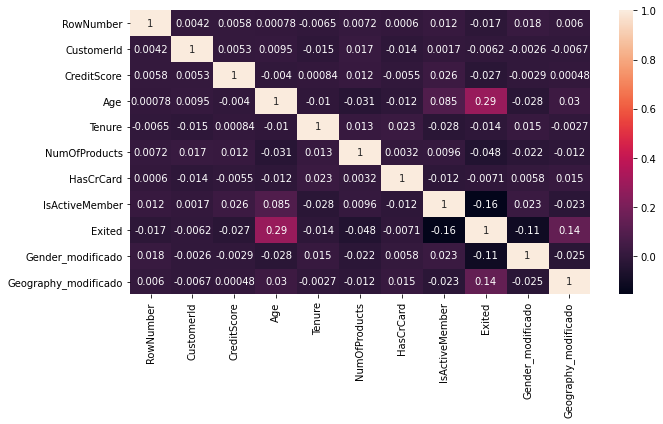

In [33]:
#Buscando correlación entre variables

fig, ax = plt.subplots(figsize=(10,6))

sns.heatmap(df_Churn_Modelling_archivo.corr(), 
            annot=True, 
            ax=ax)

plt.tight_layout()

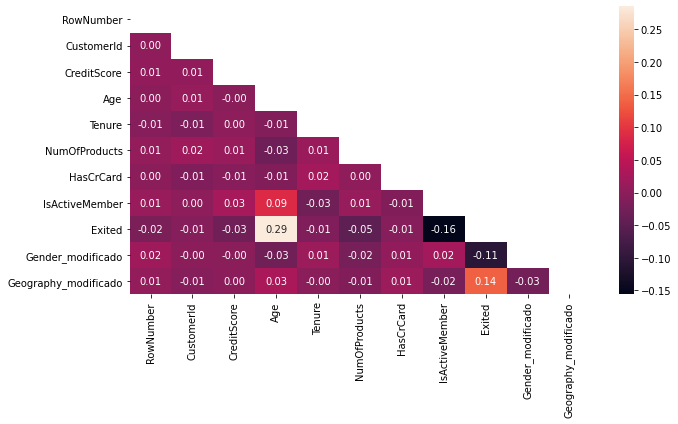

In [34]:
#se limpia el gráfico----veo que la edad no tiene correlación sino está relacionado con la cantidad de productos que tenga en el banco
fig, ax = plt.subplots(figsize=(10,6))

mask = np.triu(np.ones_like(df_Churn_Modelling_archivo.corr(),dtype = bool))
sns.heatmap(df_Churn_Modelling_archivo.corr(), mask = mask, fmt = ".2f",
            annot=True, 
            ax=ax)

plt.tight_layout()

In [ ]:
#Se observa que la relación más alta se da entre Age y Excited con 0,29--Por lo cual se intenterá predecir el churn con un modelo
#basado en lo anterior




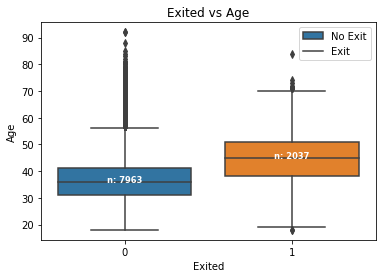

In [35]:
#Quiero graficar como quedaría la relación Age-Exited

# Crear el boxplot
sns.boxplot(x='Exited', y='Age', data=df_Churn_Modelling_archivo)

# Agregar leyenda
plt.legend(labels=['No Exit', 'Exit'])

# Obtener las cantidades en el centro de cada gráfico
medians = df_Churn_Modelling_archivo.groupby(['Exited'])['Age'].median().values
nobs = df_Churn_Modelling_archivo['Exited'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]

# Agregar las cantidades en el centro
pos = range(len(nobs))
for tick, label in zip(pos, plt.gca().get_xticklabels()):
    plt.text(pos[tick], medians[tick] + 0.03, nobs[tick], horizontalalignment='center', size='small', color='w', weight='semibold')

# Añadir título al gráfico
plt.title("Exited vs Age")

# Mostrar el gráfico
plt.show()


In [ ]:
#Así se ve graficada esa relación. Habíamos visto que a medida que aumenta la edad aumenta el churn


In [36]:
df_Churn_Modelling_archivo['Balance'].dtype

dtype('O')

In [37]:
#Hago un modelo para predecir el EstimatedSalary y el CreditScore. EstimatedSalary variable dependiente (Y) y CreditScore independiente(X)
#se puede ver que el Pv es mayor a 0,05 por lo cual vamos a descartar la variable CreditScore.
import statsmodels.api as sm
import statsmodels.formula.api as smf

model = 'Exited ~ Age'

# La función ols() se utiliza para especificar el modelo de regresión lineal.
lm = smf.ols(formula=model, data=df_Churn_Modelling_archivo).fit()
print(lm.summary())


                            OLS Regression Results                            
Dep. Variable:                 Exited   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     886.1
Date:                Tue, 19 Mar 2024   Prob (F-statistic):          1.24e-186
Time:                        19:53:12   Log-Likelihood:                -4670.4
No. Observations:               10000   AIC:                             9345.
Df Residuals:                    9998   BIC:                             9359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2228      0.015    -15.014      0.0

In [ ]:
#Ahora pienso que es probable que la edad pueda que no sea un factor determinante. Para ello me interesa saber la actividad de los clientes:
#Cuento clientes activos vs inactivos, posiblemente por acá pueda obtener alguna respuesta, para saber quiénes abandonan o no el banco
df_Churn_Modelling_archivo['IsActiveMember'].value_counts()

In [38]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [39]:
import statsmodels.formula.api as smf

# Modelo con Exited como variable dependiente y Age y IsActiveMember como variables independientes
model2 = 'Exited ~ Age + IsActiveMember'

# Utilizamos la función ols() para especificar el modelo de regresión lineal
lm2 = smf.ols(formula=model2, data=df_Churn_Modelling_archivo).fit()

# Imprimimos el resumen del modelo
print(lm2.summary())


                            OLS Regression Results                            
Dep. Variable:                 Exited   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     644.6
Date:                Tue, 19 Mar 2024   Prob (F-statistic):          4.70e-264
Time:                        19:53:28   Log-Likelihood:                -4488.4
No. Observations:               10000   AIC:                             8983.
Df Residuals:                    9997   BIC:                             9005.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.1705      0.015    -11.

In [40]:
#Modelo con Exited como variable dependiente y Age y IsActiveMember como variables independientes
model3 = 'Age ~  Exited  + IsActiveMember + EstimatedSalary '

# Utilizamos la función ols() para especificar el modelo de regresión lineal
lm3 = smf.ols(formula=model3, data=df_Churn_Modelling_archivo).fit()

# Imprimimos el resumen del modelo
print(lm3.summary())


KeyboardInterrupt: 

In [ ]:
#Quiero verificar si agregando el Salario Estimado mejora el modelo. 
#Pero como resultado no se ve que mejore la robustez del modelo si lo comparo con el modelo 1 teniendo en cuenta el R-squared

In [ ]:
# Modelo con Exited como variable dependiente  Age + IsActiveMember + Balance como variables independientes
model5 = 'Exited ~ Age + IsActiveMember + Balance'

# Utiliza la función ols() para especificar el modelo de regresión lineal
lm5 = smf.ols(formula=model5, data=df_Churn_Modelling_archivo).fit()

# Imprime el resumen del modelo
print(lm5.summary())


In [ ]:
# Modelo con Exited como variable dependiente y Age e IsActiveMember como variables independientes
model4 = 'Exited ~ Age + IsActiveMember + EstimatedSalary + Tenure +  HasCrCard'

# Utilizamos la función ols() para especificar el modelo de regresión lineal
lm4 = smf.ols(formula=model4, data=df_Churn_Modelling_archivo).fit()

# Imprimimos el resumen del modelo
print(lm4.summary())


In [ ]:
#los valores predichos del modelo
predicted_values = lm2.predict()

# Gráfico de dispersión de valores reales vs valores predichos
plt.scatter(df_Churn_Modelling_archivo['Exited'], predicted_values)
plt.xlabel('Exited (Valores reales)')
plt.ylabel('Exited (Valores predichos)')
plt.title('Gráfico de dispersión de valores reales vs predichos')
plt.show()

# Gráfico de residuos
residuals = lm2.resid
plt.scatter(predicted_values, residuals)
plt.xlabel('Exited (Valores predichos)')
plt.ylabel('Residuos')
plt.axhline(y=0, color='r', linestyle='--', linewidth=1.5)
plt.title('Gráfico de residuos')
plt.show()


In [ ]:
#Cada punto representa una observación del conjunto de datos.
#Si el modelo es bueno, los puntos deberían estar cerca de la línea diagonal. Un patrón fuertemente no lineal o dispersión desigual puede indicar problemas en la modelización.

#Gráfico de residuos:
# residuos son las diferencias entre los valores reales y los predichos.
#Un patrón sistemático en el gráfico de residuos puede indicar que el modelo no está capturando completamente la estructura de los datos.
#La línea horizontal en rojo en el gráfico de residuos es la línea cero, y los residuos deberían distribuirse alrededor de esta línea si el modelo es adecuado.
#Estos gráficos te ayudarán a evaluar visualmente el rendimiento de tu modelo de regresión lineal múltiple.

In [ ]:

#Con este último modelo quise ver si le agregaba variables y lo hacía más complejo iba a mejorar la capacidad de predecir. 
#Por ejemplo teniendo en cuenta que a mayor salario, mayor tenencias de productos por lo cual podía haber menos probablidades de que deje el banco, pero no tuve esos resultados.  
#Si se tiene en cuenta el F-statistic es más alto en el Modelo II, indicando un mejor ajuste general del modelo, y es más simple al incluir menos variables.


In [ ]:
#RESUMEN DE LO REALIZADO
#Sabiendo que creo que estaba adelantado con esta entrega, por lo que fui entregando antes, ahora fui agregando variables para mejorar los modelos y dejé las conclusiones. Si detecto que BALANCE estaba como O y lo paso a números.  #
#A partir de esto creo que se me abre otro panorame para seguir profundizando con esta variable. Además agregué un gráfico del Modelo II para ratar de
#entender si el modelo va a ser capaz de predecir. Falta profundizar que espero seguir adquiendo conocomiento para poder hacerlo. 

In [41]:
df_Churn_Modelling_archivo['Balance'].dtype

dtype('O')

In [ ]:
#sigo acá probando

In [ ]:
#nueva entrega--probando modelos

In [ ]:
###MODELOS##

In [42]:
#PRUEBA 1

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


# 1. Se preparan los datos



In [24]:
# Cargar el DataFrame desde el archivo CSV
df_Churn_Modelling_archivo = pd.read_csv('Churn_Modelling.csv')

In [25]:
df_Churn_Modelling_archivo.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [26]:
# Se crea un diccionario de mapeo para la transformación de  Geography string en números 1 = Spain , 2= France  y 3= Germany
geography_mapping = {'France': 2, 'Spain': 1, 'Germany': 3}

# Se aplica la transformación a la columna 'Geography' y se crea una nueva columna 'Geography_modificado'
df_Churn_Modelling_archivo['Geography_modificado'] = df_Churn_Modelling_archivo['Geography'].map(geography_mapping)

# Se Imprime el data frame
print(df_Churn_Modelling_archivo.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  Geography_modificado  
0        101348.88       1                     2  
1        112542.58       0                     1  
2    

In [27]:
df_Churn_Modelling_archivo.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_modificado'],
      dtype='object')

In [28]:
#la variable objetivo (variable dependiente) va a ser se llama 'Exited'

# División de los datos en conjunto de características (X) y variable objetivo (y)

X = df_Churn_Modelling_archivo[["Age", "IsActiveMember"]]
y = df_Churn_Modelling_archivo["Exited"]


In [29]:
# Suponiendo que X_new contiene un nuevo conjunto de características
X_new = df_Churn_Modelling_archivo[["Tenure", "Balance"]]

# Importamos la función train_test_split
from sklearn.model_selection import train_test_split

# Aplicamos train-test-split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)


In [34]:
from sklearn.linear_model import LinearRegression

# Ajustamos el modelo de regresión lineal utilizando OLS

# Creamos una instancia del modelo de regresión lineal
model = LinearRegression()

# Ajustamos el modelo utilizando los datos de entrenamiento
model.fit(X_train, y_train)


LinearRegression()

In [35]:
# Realizar predicciones
y_pred = model.predict(X_test)


In [37]:
from sklearn.metrics import mean_squared_error

# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio del modelo:", mse)



Error cuadrático medio del modelo: 0.15505171269008644


In [ ]:
#veo un buen ajuste del modelo

In [38]:
#Prueba 2 con R²


from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


#Analiza las métricas de evaluación para comprender qué tan bien el modelo se ajusta a 
#los datos de prueba. Por ejemplo, un MSE más bajo y un  más alto indican un mejor rendimiento del modelo. El R2 está un poco bajo


Mean Squared Error: 0.15505171269008644
R-squared: 0.010970375712446634


In [39]:
#PRUEBA 3 
#prueba con SVC

from sklearn.svm import SVC

#Creamos nuestro modelo de SVM
model = SVC(gamma='auto', kernel='rbf')



In [40]:
# Entrenamos el modelo
model.fit(X_train, y_train)

SVC(gamma='auto')

In [58]:
print(X_test.head())


      Tenure    Balance
6252       3   96709.07
4684       1       0.00
1731       4       0.00
4742       8  119152.10
4521       7  124995.98


In [59]:
# Generamos las predicciones
y_pred = model.predict(X_test)
print(y_pred)


[0 0 0 ... 0 0 0]


In [60]:
from sklearn.metrics import accuracy_score

# Calculamos la precisión en el conjunto de prueba
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy en el conjunto de prueba:", accuracy)




Accuracy en el conjunto de prueba: 0.8046666666666666


In [61]:
#se genera el informe de  clasificación que resume el rendimiento del modelo

from sklearn.metrics import classification_report
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      2416
           1       0.33      0.00      0.01       584

    accuracy                           0.80      3000
   macro avg       0.57      0.50      0.45      3000
weighted avg       0.71      0.80      0.72      3000



In [62]:
#prueba 4  Random Forest


#entrenar el arbol.

from sklearn import tree 

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [63]:
#acá quiero obtener los valores únicos en la variable objetivo exited del conjunto de datos de entrenamiento. 
y_train.unique()

array([1, 0], dtype=int64)

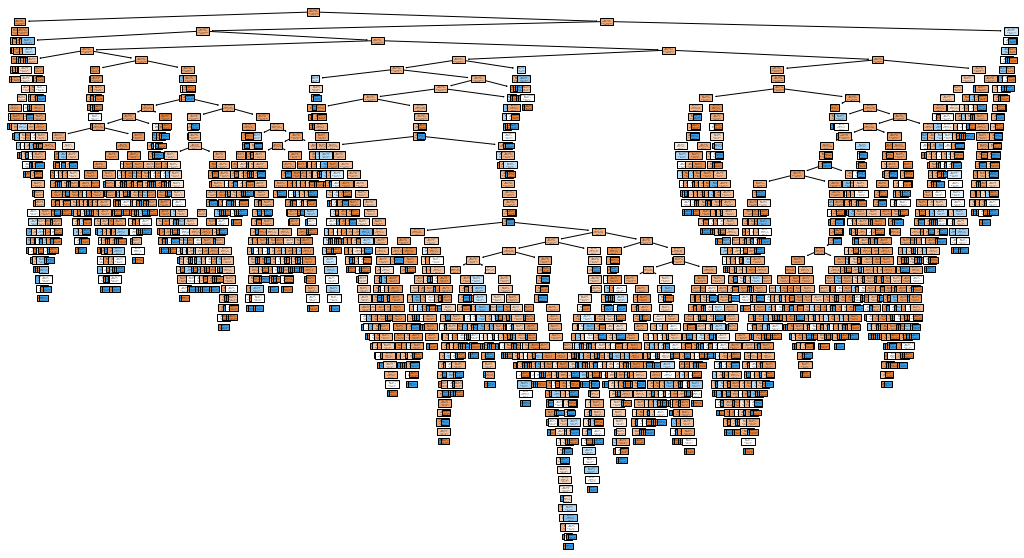

In [64]:
#acá quise graficar el arbol de decisión

from matplotlib import pyplot as plt
from sklearn import tree

# Crea la figura y plotea el árbol
plt.figure(figsize=(18, 10))
tree.plot_tree(clf, feature_names=X_train.columns, class_names=['0', '1'], filled=True)

# Muestra el Random Forest
plt.show()


In [65]:
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [66]:
y_test.tolist()

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,


In [67]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83      2416
           1       0.24      0.20      0.22       584

    accuracy                           0.72      3000
   macro avg       0.53      0.52      0.52      3000
weighted avg       0.70      0.72      0.71      3000



In [68]:
# Calculamos la precisión en el conjunto de prueba

#clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Hacer predicciones sobre el conjunto de prueba
y_pred = clf.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del árbol de decisión: {:.2f}".format(accuracy))

Precisión del árbol de decisión: 0.72


In [ ]:
#NUEVA ENTREGA 05-03 AGREGAR VARIABLES

In [41]:
#reviso los datos
print(df_Churn_Modelling_archivo.dtypes)


RowNumber                 int64
CustomerId                int64
Surname                  object
CreditScore               int64
Geography                object
Gender                   object
Age                       int64
Tenure                    int64
Balance                 float64
NumOfProducts             int64
HasCrCard                 int64
IsActiveMember            int64
EstimatedSalary         float64
Exited                    int64
Geography_modificado      int64
dtype: object


In [42]:
# Se crea un diccionario de mapeo para la transformación de  Gender string en números 0- 1
gender_mapping = {'Male': 1, 'Female': 0}

# Se aplica la transformación a la columna 'Gender' y se crea una nueva columna 'Gender_modificado'
df_Churn_Modelling_archivo['Gender_modificado'] = df_Churn_Modelling_archivo['Gender'].map(gender_mapping)

# Imprimir el data frame
print(df_Churn_Modelling_archivo.head())


   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  Geography_modificado  Gender_modificado  
0        101348.88       1                     2                  0  
1        112542.58

In [43]:
#Quiero quitar las columnas, RowNumber, Surname y CustomerId
df_Churn_Modelling_archivo = df_Churn_Modelling_archivo.drop(['RowNumber', 'Surname', 'CustomerId'], axis=1)


In [44]:
print(df_Churn_Modelling_archivo.dtypes)

CreditScore               int64
Geography                object
Gender                   object
Age                       int64
Tenure                    int64
Balance                 float64
NumOfProducts             int64
HasCrCard                 int64
IsActiveMember            int64
EstimatedSalary         float64
Exited                    int64
Geography_modificado      int64
Gender_modificado         int64
dtype: object


In [45]:
print(df_Churn_Modelling_archivo.columns)

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Geography_modificado', 'Gender_modificado'],
      dtype='object')


In [46]:
# #prueba 5 Vuelvo agregar Balance al modelo
modelregresion = 'Age ~  Exited  + IsActiveMember + EstimatedSalary +Balance'

# Utilizamos la función ols() para especificar el modelo de regresión lineal
modelregresion = smf.ols(formula=modelregresion, data=df_Churn_Modelling_archivo).fit()

# Imprimimos el resumen del modelo
print(modelregresion.summary())

NameError: name 'smf' is not defined

In [75]:
# #prueba 6
import statsmodels.formula.api as smf

# Modelo con Exited como variable dependiente y Age y IsActiveMember como variables independientes y vuelvo a agregar Balance
modelregresion2 = 'Exited ~ Age + IsActiveMember + Balance'

# Utilizamos la función ols() para especificar el modelo de regresión lineal
modelregresion2 = smf.ols(formula=modelregresion2, data=df_Churn_Modelling_archivo).fit()

# Imprimimos el resumen del modelo
print(modelregresion2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Exited   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     480.1
Date:                Tue, 19 Mar 2024   Prob (F-statistic):          1.79e-291
Time:                        20:06:34   Log-Likelihood:                -4421.9
No. Observations:               10000   AIC:                             8852.
Df Residuals:                    9996   BIC:                             8881.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.2198      0.015    -14.

In [ ]:
#Vuelvo a revisar la variable objetivo. Teniendo en cuenta que solo tengo el 20% de info para predecir, 
# es decir los que se que pueden abandonar el banco, tendría que buscar una buena precisión en el modelo



In [47]:
#Quería saber la cantidad de personas por  páis 

cantidad_por_pais = df_Churn_Modelling_archivo['Geography'].value_counts()
print(cantidad_por_pais)


France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64


In [48]:
#recuerdo las columnas que tenía en el df

df_Churn_Modelling_archivo.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_modificado,Gender_modificado
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,2,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,2,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,2,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0


In [49]:
#Comienzo a agregar las nuevas variables que pide el desafío
# Crear una nueva variable combinando 'Geography' y 'Gender'
df_Churn_Modelling_archivo['Geography_Gender'] = df_Churn_Modelling_archivo['Geography'] + '_' + df_Churn_Modelling_archivo['Gender']

# Visualizar el DataFrame con la nueva variable creada
print(df_Churn_Modelling_archivo.head())


   CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  Geography_modificado  \
0          1               1        101348.88       1                     2   
1          0               1        112542.58       0                     1   
2          1               0        113931.57       1                     2   
3          0               0         93826.63       0                     2   
4          1               1         79084.10       0                     1   

   Gender_modificado Geography_Gender  
0                  0    France_Fem

In [50]:
# Cuento la frecuencia de cada combinación de 'Geography' y 'Gender'
counts = df_Churn_Modelling_archivo['Geography_Gender'].value_counts()
print(counts)




France_Male       2753
France_Female     2261
Spain_Male        1388
Germany_Male      1316
Germany_Female    1193
Spain_Female      1089
Name: Geography_Gender, dtype: int64


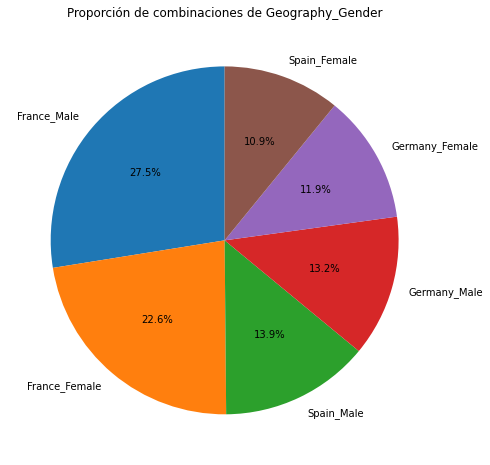

In [80]:
# Grafico las combinaciones para saber cuál es la combinación q más se da de personas
plt.figure(figsize=(8, 8))
counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Proporción de combinaciones de Geography_Gender')
plt.ylabel('')
plt.show()


In [ ]:
#Como vimos anteriormente, la mayor cantidad de datos provenían de Francia, era lógico que 
#las mayores combinaciones se iban a dar con personanas de Francia

In [51]:
#sigo agregando nuevas variables/columnas para mejorar el modelo combino Balance con Credit Score

# Convertir ambas variables a cadenas y luego concatenarlas
df_Churn_Modelling_archivo['Balance_CreditScore'] = df_Churn_Modelling_archivo['Balance'].astype(str) + '_' + df_Churn_Modelling_archivo['CreditScore'].astype(str)

print(df_Churn_Modelling_archivo.head())


   CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  Geography_modificado  \
0          1               1        101348.88       1                     2   
1          0               1        112542.58       0                     1   
2          1               0        113931.57       1                     2   
3          0               0         93826.63       0                     2   
4          1               1         79084.10       0                     1   

   Gender_modificado Geography_Gender Balance_CreditScore  
0             

In [52]:
# Cuento la frecuencia de los valores en la nueva columna 'Balance_CreditScore'
counts_balance_creditscore = df_Churn_Modelling_archivo['Balance_CreditScore'].value_counts()

# Imprimir los resultados
print(counts_balance_creditscore)


0.0_850          78
0.0_678          26
0.0_663          20
0.0_711          20
0.0_655          20
                 ..
125877.65_567     1
160777.9_573      1
145155.37_624     1
176273.95_515     1
40169.88_715      1
Name: Balance_CreditScore, Length: 6817, dtype: int64


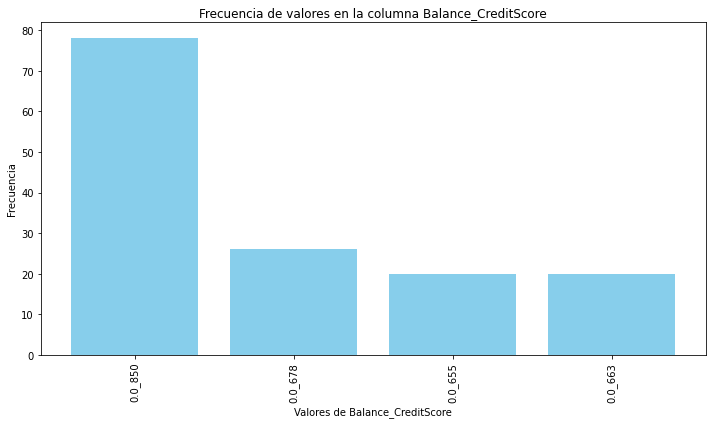

In [53]:
import matplotlib.pyplot as plt

# Suponiendo que counts_balance_creditscore es un diccionario con los valores de frecuencia
# y sus respectivas etiquetas, por ejemplo:
counts_balance_creditscore = {
    '0.0_850': 78,
    '0.0_678': 26,
    '0.0_655': 20,
    '0.0_663': 20,
    # y así sucesivamente
}

# Extraer las etiquetas y frecuencias
etiquetas = list(counts_balance_creditscore.keys())
frecuencias = list(counts_balance_creditscore.values())

# Graficar
plt.figure(figsize=(10, 6))
plt.bar(etiquetas, frecuencias, color='skyblue')
plt.xlabel('Valores de Balance_CreditScore')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de valores en la columna Balance_CreditScore')
plt.xticks(rotation=90)  # Rotar etiquetas del eje x para mejor legibilidad
plt.tight_layout()  # Ajustar diseño para evitar recorte de etiquetas
plt.show()


In [54]:
# Cuento los valores únicos en la nueva columna 'Balance_CreditScore'
unique_values_balance_creditscore = df_Churn_Modelling_archivo['Balance_CreditScore'].nunique()

# Imprimir el número de valores únicos
print("Número de valores únicos en Balance_CreditScore:", unique_values_balance_creditscore)


Número de valores únicos en Balance_CreditScore: 6817


In [55]:
#sigo agregando nuevas variables/columnas diviendo la tenencia sobre el balance

# Calcula la nueva variable 'Tenencia sobre Balance' con manejo de división por cero
df_Churn_Modelling_archivo['Tenencia_sobre_Balance'] = df_Churn_Modelling_archivo['Tenure'] / df_Churn_Modelling_archivo['Balance']
df_Churn_Modelling_archivo['Tenencia_sobre_Balance'].replace(np.inf, np.nan, inplace=True)

# Imprimir el DataFrame para verificar la nueva variable
print(df_Churn_Modelling_archivo.head())


   CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  Geography_modificado  \
0          1               1        101348.88       1                     2   
1          0               1        112542.58       0                     1   
2          1               0        113931.57       1                     2   
3          0               0         93826.63       0                     2   
4          1               1         79084.10       0                     1   

   Gender_modificado Geography_Gender Balance_CreditScore  \
0            

In [56]:
# ahora pruebo agregar otra  variables/columnas con la tenencia, edad y Balance

import numpy as np

# Calcular la nueva variable, manejar la división por cero
df_Churn_Modelling_archivo['Tenencia_Edad_Balance'] = np.where(df_Churn_Modelling_archivo['Balance'] == 0, 0, df_Churn_Modelling_archivo['Tenure'] / (df_Churn_Modelling_archivo['Age'] * df_Churn_Modelling_archivo['Balance']))

# Imprimir el DataFrame para visualizar la nueva variable
print(df_Churn_Modelling_archivo.head())



   CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  Geography_modificado  \
0          1               1        101348.88       1                     2   
1          0               1        112542.58       0                     1   
2          1               0        113931.57       1                     2   
3          0               0         93826.63       0                     2   
4          1               1         79084.10       0                     1   

   Gender_modificado Geography_Gender Balance_CreditScore  \
0            

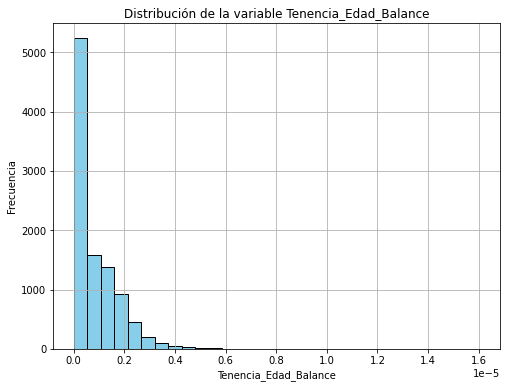

In [57]:
 #Quería ver gráficamente como era la distribución Tenencia_Edad_Balance

import matplotlib.pyplot as plt

# Eliminar los valores infinitos ('inf') de la nueva variable -- inf eran los valores nulos o nan
tenencia_edad_balance_sin_inf = df_Churn_Modelling_archivo.replace([np.inf, -np.inf], np.nan).dropna(subset=['Tenencia_Edad_Balance'])

# Graficar un histograma
plt.figure(figsize=(8, 6))
plt.hist(tenencia_edad_balance_sin_inf['Tenencia_Edad_Balance'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución de la variable Tenencia_Edad_Balance')
plt.xlabel('Tenencia_Edad_Balance')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


In [58]:
# Calcular la nueva variable 'Tenencia sobre Edad'
df_Churn_Modelling_archivo['Tenencia_sobre_Edad'] = df_Churn_Modelling_archivo['Tenure'] / df_Churn_Modelling_archivo['Age']




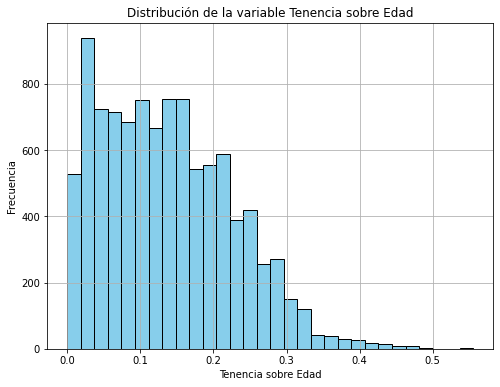

In [59]:
# Graficar la nueva variable
plt.figure(figsize=(8, 6))
plt.hist(df_Churn_Modelling_archivo['Tenencia_sobre_Edad'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución de la variable Tenencia sobre Edad')
plt.xlabel('Tenencia sobre Edad')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

In [ ]:
#La variable 'Tenencia sobre Edad' que se calculó representa la relación entre la cantidad de tiempo que un cliente 
#ha sido titular de una cuenta ('Tenure') y su edad. Al graficar esta variable, se vizualiza la distribución de 
#esta relación en el conjunto de datos.


#Eje x (Tenencia sobre Edad): Este eje muestra los valores de la variable 'Tenencia sobre Edad'. 
#Cada barra representa un rango específico de valores de esta relación.

#Eje y (Frecuencia): Este eje muestra la frecuencia o cantidad de observaciones que caen 
#dentro de cada rango de valores de 'Tenencia sobre Edad'. 
#Cuanto más alta sea la barra en el histograma, mayor será la cantidad de observaciones que tienen una relación 'Tenencia sobre Edad' dentro de ese rango.

#Se observa que tiene una forma sesgada hacia la izquierda (negativamente sesgada), esto podría indicar que hay más clientes más jóvenes con una mayor relación 'Tenencia sobre Edad'.


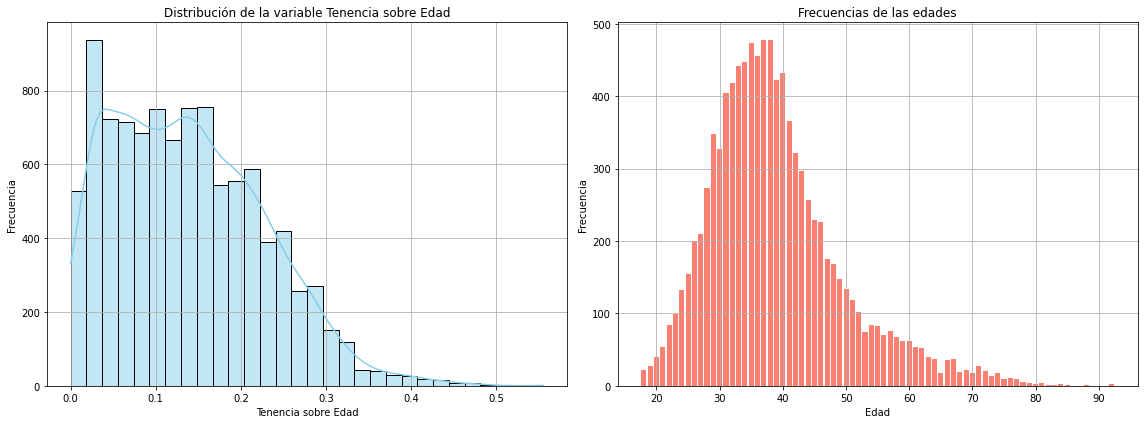

In [60]:
# Graficar la nueva variable con KDE
plt.figure(figsize=(16, 6))

# Subtrama para el histograma de la variable Tenencia sobre Edad
plt.subplot(1, 2, 1)
sns.histplot(df_Churn_Modelling_archivo['Tenencia_sobre_Edad'].dropna(), bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribución de la variable Tenencia sobre Edad')
plt.xlabel('Tenencia sobre Edad')
plt.ylabel('Frecuencia')
plt.grid(True)

# Subtrama para las frecuencias de las edades
plt.subplot(1, 2, 2)
frecuencia_edades_sorted = df_Churn_Modelling_archivo['Age'].value_counts().sort_index()
plt.bar(frecuencia_edades_sorted.index, frecuencia_edades_sorted.values, color='salmon')
plt.title('Frecuencias de las edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(True)

plt.tight_layout()
plt.show()




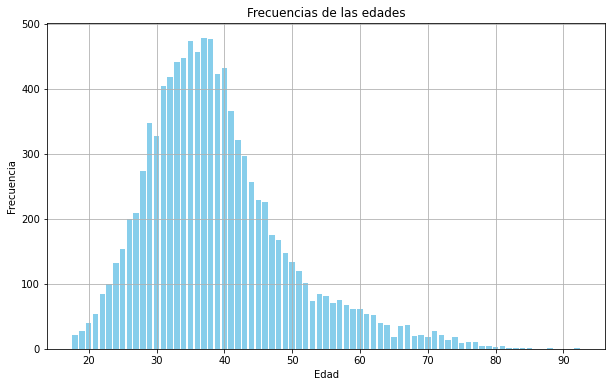

In [61]:
# Contar las edades con su frecuencia
frecuencia_edades = df_Churn_Modelling_archivo['Age'].value_counts().sort_index()

# Graficar las frecuencias de las edades
plt.figure(figsize=(10, 6))
plt.bar(frecuencia_edades.index, frecuencia_edades.values, color='skyblue')
plt.title('Frecuencias de las edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


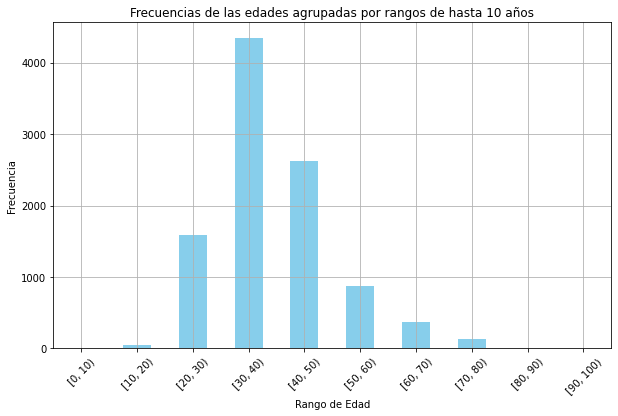

In [62]:
# Contar las edades con su frecuencia -- quiero verla de otra forma para asegurarme las afirmaciones
import pandas as pd

# Definir los rangos de edad
bins = range(0, df_Churn_Modelling_archivo['Age'].max() + 11, 10)

# Crear categorías de edad
categorias_edad = pd.cut(df_Churn_Modelling_archivo['Age'], bins=bins, right=False)

# Contar las frecuencias de las categorías de edad
frecuencia_edades = categorias_edad.value_counts().sort_index()

# Graficar las frecuencias de las edades
plt.figure(figsize=(10, 6))
frecuencia_edades.plot(kind='bar', color='skyblue')
plt.title('Frecuencias de las edades agrupadas por rangos de hasta 10 años')
plt.xlabel('Rango de Edad')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


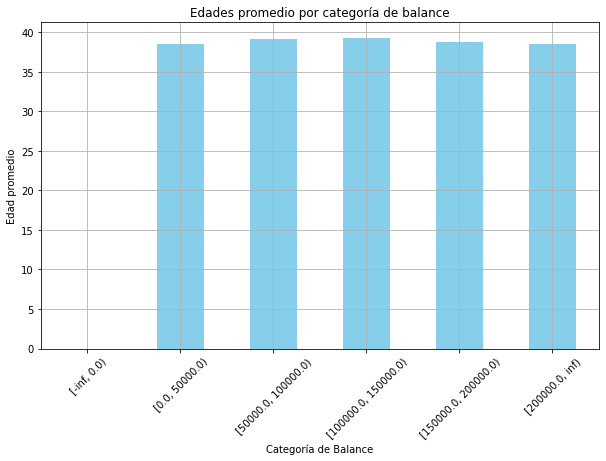

In [63]:
# Definir los rangos de balance --- como para agregar más info para análisis
balance_bins = [-float('inf'), 0, 50000, 100000, 150000, 200000, float('inf')]

# Crear categorías de balance
categorias_balance = pd.cut(df_Churn_Modelling_archivo['Balance'], bins=balance_bins, right=False)

# Obtener las edades correspondientes a cada categoría de balance
edades_por_balance = df_Churn_Modelling_archivo.groupby(categorias_balance)['Age'].mean()

# Graficar las edades promedio por categoría de balance
plt.figure(figsize=(10, 6))
edades_por_balance.plot(kind='bar', color='skyblue')
plt.title('Edades promedio por categoría de balance')
plt.xlabel('Categoría de Balance')
plt.ylabel('Edad promedio')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


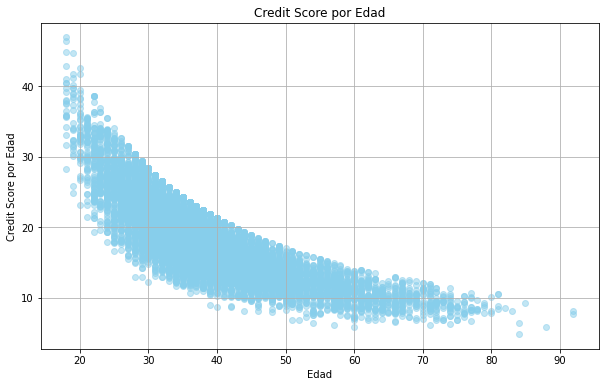

In [64]:
# Creo una nueva variable CreditScore por edad
df_Churn_Modelling_archivo['CreditScore_por_Edad'] = df_Churn_Modelling_archivo['CreditScore'] / df_Churn_Modelling_archivo['Age']

# Graficar la nueva variable CreditScore por edad
plt.figure(figsize=(10, 6))
plt.scatter(df_Churn_Modelling_archivo['Age'], df_Churn_Modelling_archivo['CreditScore_por_Edad'], color='skyblue', alpha=0.5)
plt.title('Credit Score por Edad')
plt.xlabel('Edad')
plt.ylabel('Credit Score por Edad')
plt.grid(True)
plt.show()


In [65]:
# Creo la nueva variable CreditScore por edad y agregarla al DataFrame---
df_Churn_Modelling_archivo['CreditScore_por_Edad'] = df_Churn_Modelling_archivo['CreditScore'] / df_Churn_Modelling_archivo['Age']

#quería recorar gráficamente como era el credit score en relación a la edad


In [66]:
# Para ver  las primeras filas del DataFrame con la nueva columna
print(df_Churn_Modelling_archivo.head())


   CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  Geography_modificado  \
0          1               1        101348.88       1                     2   
1          0               1        112542.58       0                     1   
2          1               0        113931.57       1                     2   
3          0               0         93826.63       0                     2   
4          1               1         79084.10       0                     1   

   Gender_modificado Geography_Gender Balance_CreditScore  \
0            

In [67]:
print(pd.unique(y_test))


[0 1]


In [68]:
print(df_Churn_Modelling_archivo.head())

   CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  Geography_modificado  \
0          1               1        101348.88       1                     2   
1          0               1        112542.58       0                     1   
2          1               0        113931.57       1                     2   
3          0               0         93826.63       0                     2   
4          1               1         79084.10       0                     1   

   Gender_modificado Geography_Gender Balance_CreditScore  \
0            

In [69]:
#Elimino las columnas Gender y Geography preparano los datos ya para poder crear los modelos

df_Churn_Modelling_archivo = df_Churn_Modelling_archivo.drop(columns=['Gender', 'Geography'])


In [70]:
print(df_Churn_Modelling_archivo.head())

   CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_modificado  \
0               1        101348.88       1                     2   
1               1        112542.58       0                     1   
2               0        113931.57       1                     2   
3               0         93826.63       0                     2   
4               1         79084.10       0                     1   

   Gender_modificado Geography_Gender Balance_CreditScore  \
0                  0    France_Female             0.0_619   
1                  0     Spain_Female        83807.86_608   

In [71]:
print(df_Churn_Modelling_archivo.dtypes)


CreditScore                 int64
Age                         int64
Tenure                      int64
Balance                   float64
NumOfProducts               int64
HasCrCard                   int64
IsActiveMember              int64
EstimatedSalary           float64
Exited                      int64
Geography_modificado        int64
Gender_modificado           int64
Geography_Gender           object
Balance_CreditScore        object
Tenencia_sobre_Balance    float64
Tenencia_Edad_Balance     float64
Tenencia_sobre_Edad       float64
CreditScore_por_Edad      float64
dtype: object


In [72]:
# Convierto la columna 'Balance_CreditScore' a tipo float para poder modelar
df_Churn_Modelling_archivo['Balance_CreditScore'] = df_Churn_Modelling_archivo['Balance_CreditScore'].str.replace(',', '').astype(float)

# Codifico la columna 'Geography_Gender' utilizando Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_Churn_Modelling_archivo['Geography_Gender_encoded'] = label_encoder.fit_transform(df_Churn_Modelling_archivo['Geography_Gender'])


In [73]:
print(df_Churn_Modelling_archivo.dtypes)

CreditScore                   int64
Age                           int64
Tenure                        int64
Balance                     float64
NumOfProducts                 int64
HasCrCard                     int64
IsActiveMember                int64
EstimatedSalary             float64
Exited                        int64
Geography_modificado          int64
Gender_modificado             int64
Geography_Gender             object
Balance_CreditScore         float64
Tenencia_sobre_Balance      float64
Tenencia_Edad_Balance       float64
Tenencia_sobre_Edad         float64
CreditScore_por_Edad        float64
Geography_Gender_encoded      int32
dtype: object


In [74]:
from sklearn.preprocessing import LabelEncoder

# Se Inicializa el codificador de etiquetas
label_encoder = LabelEncoder()

# Codifico 'Geography_Gender'
df_Churn_Modelling_archivo['Geography_Gender_encoded'] = label_encoder.fit_transform(df_Churn_Modelling_archivo['Geography_Gender'])

# se Verifican e imprimin los valores codificados
print(df_Churn_Modelling_archivo['Geography_Gender_encoded'].head())


0    0
1    4
2    0
3    0
4    4
Name: Geography_Gender_encoded, dtype: int32


In [75]:
print(df_Churn_Modelling_archivo.dtypes)

CreditScore                   int64
Age                           int64
Tenure                        int64
Balance                     float64
NumOfProducts                 int64
HasCrCard                     int64
IsActiveMember                int64
EstimatedSalary             float64
Exited                        int64
Geography_modificado          int64
Gender_modificado             int64
Geography_Gender             object
Balance_CreditScore         float64
Tenencia_sobre_Balance      float64
Tenencia_Edad_Balance       float64
Tenencia_sobre_Edad         float64
CreditScore_por_Edad        float64
Geography_Gender_encoded      int32
dtype: object


In [76]:
df_Churn_Modelling_archivo['Geography_Gender_encoded'] = df_Churn_Modelling_archivo['Geography_Gender_encoded'].astype('int64')


In [77]:
print(df_Churn_Modelling_archivo.dtypes)

CreditScore                   int64
Age                           int64
Tenure                        int64
Balance                     float64
NumOfProducts                 int64
HasCrCard                     int64
IsActiveMember                int64
EstimatedSalary             float64
Exited                        int64
Geography_modificado          int64
Gender_modificado             int64
Geography_Gender             object
Balance_CreditScore         float64
Tenencia_sobre_Balance      float64
Tenencia_Edad_Balance       float64
Tenencia_sobre_Edad         float64
CreditScore_por_Edad        float64
Geography_Gender_encoded      int64
dtype: object


In [78]:
#Elimino 'Geography_Gender'
df_Churn_Modelling_archivo.drop(columns=['Geography_Gender'], inplace=True)


In [79]:
print(df_Churn_Modelling_archivo.dtypes)

CreditScore                   int64
Age                           int64
Tenure                        int64
Balance                     float64
NumOfProducts                 int64
HasCrCard                     int64
IsActiveMember                int64
EstimatedSalary             float64
Exited                        int64
Geography_modificado          int64
Gender_modificado             int64
Balance_CreditScore         float64
Tenencia_sobre_Balance      float64
Tenencia_Edad_Balance       float64
Tenencia_sobre_Edad         float64
CreditScore_por_Edad        float64
Geography_Gender_encoded      int64
dtype: object


In [80]:
#veo como me quedaron las columnas del df
df_Churn_Modelling_archivo.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_modificado,Gender_modificado,Balance_CreditScore,Tenencia_sobre_Balance,Tenencia_Edad_Balance,Tenencia_sobre_Edad,CreditScore_por_Edad,Geography_Gender_encoded
0,619,42,2,0.00,1,1,1,101348.88,1,2,0,0.06190,NaN,0.000000e+00,0.047619,14.738095,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0,83807.86608,0.000012,2.910257e-07,0.024390,14.829268,4
2,502,42,8,159660.80,3,1,0,113931.57,1,2,0,159660.85020,0.000050,1.193005e-06,0.190476,11.952381,0
3,699,39,1,0.00,2,0,0,93826.63,0,2,0,0.06990,NaN,0.000000e+00,0.025641,17.923077,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0,125510.82850,0.000016,3.705786e-07,0.046512,19.767442,4


In [81]:
print(df_Churn_Modelling_archivo.columns)


Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_modificado',
       'Gender_modificado', 'Balance_CreditScore', 'Tenencia_sobre_Balance',
       'Tenencia_Edad_Balance', 'Tenencia_sobre_Edad', 'CreditScore_por_Edad',
       'Geography_Gender_encoded'],
      dtype='object')


In [82]:
#Pruebo como me queda un nuevo modelo con las variables agregadas

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Excluyo la columna 'Tenencia_sobre_Balance'
X = df_Churn_Modelling_archivo.drop(columns=['Exited', 'Tenencia_sobre_Balance'])



In [83]:
# Defino la columna objetivo
y = df_Churn_Modelling_archivo['Exited']



In [84]:
# Divido los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [85]:
# Se crea el modelo de Random Forest
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)



In [86]:
# Entrenando el modelo
random_forest_model.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [117]:
# Se realizan las  predicciones en el conjunto de prueba
y_pred = random_forest_model.predict(X_test)

# Se evaluan el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.864


In [87]:
#Hago otra prueba
from sklearn.linear_model import LogisticRegression

# Excluir la columna 'Tenencia_sobre_Balance'
X = df_Churn_Modelling_archivo.drop(columns=['Exited', 'Tenencia_sobre_Balance'])

# Definir la columna objetivo
y = df_Churn_Modelling_archivo['Exited']




In [88]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [89]:
# Crear el modelo de Regresión Logística
logistic_regression_model = LogisticRegression(random_state=42)



In [90]:
# Entrenar el modelo
logistic_regression_model.fit(X_train, y_train)



LogisticRegression(random_state=42)

In [91]:
# Realizar predicciones en el conjunto de prueba
y_pred = logistic_regression_model.predict(X_test)



In [123]:
# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7985


In [92]:
#Pruebo con SVC
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Excluir la columna 'Tenencia_sobre_Balance'
X = df_Churn_Modelling_archivo.drop(columns=['Exited', 'Tenencia_sobre_Balance'])

# Definir la columna objetivo
y = df_Churn_Modelling_archivo['Exited']


In [93]:

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [94]:
# Crear el modelo SVC
svc_model = make_pipeline(StandardScaler(), SVC())


In [95]:
# Entrenar el modelo
svc_model.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [96]:
# Realizar predicciones en el conjunto de prueba
y_pred = svc_model.predict(X_test)



In [97]:
# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8585


In [130]:
from sklearn.metrics import classification_report

# Imprimo el reporte de clasificación
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1607
           1       0.79      0.38      0.52       393

    accuracy                           0.86      2000
   macro avg       0.83      0.68      0.72      2000
weighted avg       0.85      0.86      0.84      2000



In [ ]:
#se observa como mejoró el % de predición del modelo -- para la siguiente entrega entiendo que es probar con PcA

In [ ]:
#ENTREGA 12-3 - Desafio_featureselection_CARLOS_OLIVERA

In [100]:
#APLICO PCA COMBINADO CON RandomForestClassifier para tener los mejores parámetros y entrenar 


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [4]:
# Excluir la columna 'Tenencia_sobre_Balance'
X = df_Churn_Modelling_archivo.drop(columns=['Tenencia_sobre_Balance', 'Exited'])


NameError: name 'df_Churn_Modelling_archivo' is not defined

In [102]:
# Se dividen los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [103]:
# Escalamiento de  los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [104]:
# Se aplica PCA solo en los datos de entrenamiento
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)



In [105]:
# Se crea y entrena el modelo de Random Forest con datos transformados por PCA
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train_pca, y_train)



RandomForestClassifier(random_state=42)

In [106]:
# Se realizan predicciones en el conjunto de prueba
y_pred = random_forest_model.predict(X_test_pca)



In [107]:
# Se evalua el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with PCA:", accuracy)

Accuracy with PCA: 0.861


In [108]:
from sklearn.metrics import classification_report

# Imprimo el reporte de clasificación
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1607
           1       0.76      0.43      0.55       393

    accuracy                           0.86      2000
   macro avg       0.81      0.70      0.73      2000
weighted avg       0.85      0.86      0.85      2000



In [109]:
#PRUEBO COMBINAR GRID SEARCH CON PCA para buscar los mejores parámetros y entrenar el modelo

from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score



In [110]:
# Se excluiye la columna 'Tenencia_sobre_Balance'
X = df_Churn_Modelling_archivo.drop(columns=['Exited', 'Tenencia_sobre_Balance'])

# Se dDefinir la columna objetivo
y = df_Churn_Modelling_archivo['Exited']



In [111]:
# Se divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [112]:
# Se escalan los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [113]:
# Se aplicar PCA solo en los datos de entrenamiento
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)



In [114]:
# Se pruean parámetros con el Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}



In [115]:
# Se crea el modelo de Random Forest
random_forest_model = RandomForestClassifier(random_state=42)



In [121]:
# Se crea un objeto con GridSearchCV
grid_search = GridSearchCV(random_forest_model, param_grid, cv=5, scoring='accuracy')




In [122]:
# Se entrena el modelo con Grid Search
grid_search.fit(X_train_pca, y_train)



KeyboardInterrupt: 

In [ ]:
# Se obtenien los mejores parámetros
best_params = grid_search.best_params_



In [118]:
# Se entrena el modelo final con los mejores parámetros
best_random_forest_model = RandomForestClassifier(**best_params, random_state=42)
best_random_forest_model.fit(X_train_pca, y_train)



NameError: name 'best_params' is not defined

In [153]:
# Se realizan las predicciones en el conjunto de prueba
y_pred = best_random_forest_model.predict(X_test_pca)



In [154]:
# Se evalua el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with Grid Search and PCA:", accuracy)

Accuracy with Grid Search and PCA: 0.8675


In [123]:
#PRUEBA CON Random Search Cross-Validation

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score




In [124]:
# Se excluye la columna 'Tenencia_sobre_Balance'
X = df_Churn_Modelling_archivo.drop(columns=['Exited', 'Tenencia_sobre_Balance'])

# Definir la columna objetivo
y = df_Churn_Modelling_archivo['Exited']



In [125]:
# Se dividen los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [126]:
# Se escalan los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [127]:
# Se aplican PCA solo en los datos de entrenamiento
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)



In [128]:
# Se definin los rangos de los parámetros que deseas probar
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
    # Añade más parámetros para ajustar según sea necesario
}

# Se crean un objeto RandomizedSearchCV
random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)



In [129]:
# Se  ejecutan la búsqueda aleatoria en los datos de entrenamiento transformados por PCA
random_search.fit(X_train_pca, y_train)



KeyboardInterrupt: 

In [162]:
# Se obtenien los mejores parámetros encontrados
best_params = random_search.best_params_
print("Mejores parámetros encontrados:", best_params)

# Entrenar el modelo de Random Forest con los mejores parámetros encontrados
best_random_forest_model = RandomForestClassifier(**best_params, random_state=42)
best_random_forest_model.fit(X_train_pca, y_train)



Mejores parámetros encontrados: {'n_estimators': 200, 'min_samples_split': 10, 'max_depth': None}


RandomForestClassifier(min_samples_split=10, n_estimators=200, random_state=42)

In [163]:
# Se realizan predicciones en el conjunto de prueba
y_pred = best_random_forest_model.predict(X_test_pca)



In [164]:
# Se evalua el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8625


In [ ]:
#Con los difrentes métodos q se usuaron sigue dando la misma precisión para los modelos

In [ ]:
#Nueva entre desafío complementario

In [171]:
#hice un upgrade de scikit-learn y pruebo con HalvingRandomSearchCV

pip install --upgrade scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [197]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.datasets import load_iris



In [187]:
# Excluimos la columna 'Tenencia_sobre_Balance'
X = df_Churn_Modelling_archivo.drop(columns=['Exited', 'Tenencia_sobre_Balance'])


In [188]:
# Definimos la columna objetivo
y = df_Churn_Modelling_archivo['Exited']


In [189]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [190]:
# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [191]:
# Definir el clasificador RandomForestClassifier
rf_classifier = RandomForestClassifier()


In [192]:
# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [193]:
# Definir HalvingRandomSearchCV
halving_random_search = HalvingRandomSearchCV(estimator=rf_classifier, param_distributions=param_grid, 
                                              factor=2, random_state=42)

In [194]:
# Entrenar el modelo
halving_random_search.fit(X_train_scaled, y_train)


HalvingRandomSearchCV(estimator=RandomForestClassifier(), factor=2,
                      param_distributions={'max_depth': [None, 10, 20],
                                           'min_samples_leaf': [1, 2, 4],
                                           'min_samples_split': [2, 5, 10],
                                           'n_estimators': [10, 50, 100]},
                      random_state=42)

In [195]:
# Realizar predicciones en el conjunto de prueba
y_pred = halving_random_search.predict(X_test_scaled)


In [196]:
# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.87


In [ ]:
#mejoró de 86,5 a 87% dejo acá pero quiero probar con HyperOpt-Sklearn así que trataré e hacer todas las instalaciones y actualizaciones necesarios